<div align="center">
 <img src="https://raw.githubusercontent.com/matheusmota/dataviz2018/master/resources/images/logo_facens_pos.png" width="100x">
    <h3>Aprendizado de Máquina, Redes Neurais e Deep Learning</h3>  
    <h4>Ações da Bolsa de Valores com Árvores</h4>
</div>


* **203066**  - Evandro Bertolucci
* **110257**  - João Victor Carvalho
* **203071**  - Louise Constantino
* **203087**  - Luiza Constantino
* **203019**  - Murilo Piva
* **203263**  - Rafael Henrique

In [1]:
#Configuração Exibir/Ocultar Code
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [2]:
#Desativação dos alertas
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importação das bibliotecas
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Ações Escolhidas:

* Amazon
* Apple
* Facebook
* Google
* Microsoft
* Tesla

In [4]:
#importação dos datasets
dfAmazon = pd.read_csv('Amazon.csv')
dfApple = pd.read_csv('Apple.csv')
dfFacebook = pd.read_csv('Facebook.csv')
dfGoogle = pd.read_csv('Google.csv')
dfMicrosoft = pd.read_csv('Microsoft.csv')
dfTesla = pd.read_csv('Tesla.csv')

In [5]:
dfAmazon.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/19/2021,$3249.9,4305184,$3328.23,$3333.5,$3245.75
1,02/18/2021,$3328.23,3033607,$3282.42,$3338,$3273.94
2,02/17/2021,$3308.64,3302099,$3263.6,$3320.91,$3259.4996
3,02/16/2021,$3268.95,2574721,$3254.05,$3308.3,$3253.591
4,02/12/2021,$3277.71,2335339,$3250,$3280.25,$3233.31


In [6]:
dfApple.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/19/2021,$129.87,87668830,$130.24,$130.71,$128.8
1,02/18/2021,$129.71,96856750,$129.2,$129.995,$127.41
2,02/17/2021,$130.84,98085250,$131.25,$132.22,$129.47
3,02/16/2021,$133.19,80576320,$135.49,$136.01,$132.79
4,02/12/2021,$135.37,60145130,$134.35,$135.53,$133.6921


In [7]:
dfFacebook.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/19/2021,$261.56,25622590,$269.86,$270.27,$260.15
1,02/18/2021,$269.39,15249130,$269.565,$271.95,$266.03
2,02/17/2021,$273.57,12763240,$271.24,$273.97,$269.58
3,02/16/2021,$273.97,15417240,$270.8,$276.6,$270.05
4,02/12/2021,$270.5,9097597,$270.52,$271.18,$268.34


In [8]:
dfGoogle.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/19/2021,$2088.81,1896939,$2107.79,$2118.58,$2083.43
1,02/18/2021,$2105.81,1128549,$2105,$2121.99,$2093.33
2,02/17/2021,$2118.62,1015177,$2093.98,$2122.4434,$2088.35
3,02/16/2021,$2110.7,1550195,$2091.75,$2145.14,$2091.75
4,02/12/2021,$2095.03,949525,$2079.77,$2099.5,$2073.57


In [9]:
dfMicrosoft.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/19/2021,$240.97,25262600,$243.75,$243.86,$240.18
1,02/18/2021,$243.79,16925560,$241.8,$243.93,$240.86
2,02/17/2021,$244.2,21673110,$241.32,$244.31,$240.94
3,02/16/2021,$243.7,26728490,$245.03,$246.13,$242.92
4,02/12/2021,$244.99,16561080,$243.933,$245.3,$242.73


In [10]:
dfTesla.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/19/2021,$781.3,18958260,$795,$796.7899,$777.37
1,02/18/2021,$787.38,17957060,$780.9,$794.69,$776.27
2,02/17/2021,$798.15,26078900,$779.09,$799.84,$762.01
3,02/16/2021,$796.22,19802320,$818,$821,$792.44
4,02/12/2021,$816.12,23768310,$801.26,$817.33,$785.3306


In [11]:
#Tratamento do campo Closet/Last
dfAmazon['Close/Last'] = pd.to_numeric(dfAmazon['Close/Last'].str.replace('$',''))
dfApple['Close/Last'] = pd.to_numeric(dfApple['Close/Last'].str.replace('$',''))
dfFacebook['Close/Last'] = pd.to_numeric(dfFacebook['Close/Last'].str.replace('$',''))
dfGoogle['Close/Last'] = pd.to_numeric(dfGoogle['Close/Last'].str.replace('$',''))
dfMicrosoft['Close/Last'] = pd.to_numeric(dfMicrosoft['Close/Last'].str.replace('$',''))
dfTesla['Close/Last'] = pd.to_numeric(dfTesla['Close/Last'].str.replace('$',''))

In [12]:
#Padronização de todos os datasets (deixando todos com a mesma quantidade de registros)
dfAmazon = dfAmazon[['Date', 'Close/Last']][:2201]
dfApple = dfApple[['Date', 'Close/Last']][:2201]
dfFacebook = dfFacebook[['Date', 'Close/Last']][:2201]
dfGoogle = dfGoogle[['Date', 'Close/Last']][:2201]
dfMicrosoft = dfMicrosoft[['Date', 'Close/Last']][:2201]
dfTesla = dfTesla[['Date', 'Close/Last']][:2201]

In [13]:
#Alteração do nome da coluna
dfAmazon = dfAmazon.rename(columns={'Close/Last': 'Amazon'})
dfApple = dfApple.rename(columns={'Close/Last': 'Apple'})
dfFacebook = dfFacebook.rename(columns={'Close/Last': 'Facebook'})
dfGoogle = dfGoogle.rename(columns={'Close/Last': 'Google'})
dfMicrosoft = dfMicrosoft.rename(columns={'Close/Last': 'Microsoft'})
dfTesla = dfTesla.rename(columns={'Close/Last': 'Tesla'})

In [14]:
dfAmazon

,Date,Amazon
0,02/19/2021,3249.90
1,02/18/2021,3328.23
2,02/17/2021,3308.64
3,02/16/2021,3268.95
4,02/12/2021,3277.71
...,...,...
2196,05/29/2012,214.75
2197,05/25/2012,212.89
2198,05/24/2012,215.24
2199,05/23/2012,217.28


In [15]:
dfApple

,Date,Apple
0,02/19/2021,129.8700
1,02/18/2021,129.7100
2,02/17/2021,130.8400
3,02/16/2021,133.1900
4,02/12/2021,135.3700
...,...,...
2196,05/29/2012,20.4382
2197,05/25/2012,20.0818
2198,05/24/2012,20.1900
2199,05/23/2012,20.3772


In [16]:
dfFacebook

,Date,Facebook
0,02/19/2021,261.56
1,02/18/2021,269.39
2,02/17/2021,273.57
3,02/16/2021,273.97
4,02/12/2021,270.50
...,...,...
2196,05/29/2012,28.84
2197,05/25/2012,31.91
2198,05/24/2012,33.03
2199,05/23/2012,32.00


In [17]:
dfGoogle

,Date,Google
0,02/19/2021,2088.8100
1,02/18/2021,2105.8100
2,02/17/2021,2118.6200
3,02/16/2021,2110.7000
4,02/12/2021,2095.0300
...,...,...
2196,05/29/2012,300.2278
2197,05/25/2012,298.8084
2198,05/24/2012,304.9358
2199,05/23/2012,307.8656


In [18]:
dfMicrosoft

,Date,Microsoft
0,02/19/2021,240.97
1,02/18/2021,243.79
2,02/17/2021,244.20
3,02/16/2021,243.70
4,02/12/2021,244.99
...,...,...
2196,05/29/2012,29.56
2197,05/25/2012,29.06
2198,05/24/2012,29.07
2199,05/23/2012,29.11


In [19]:
dfTesla

,Date,Tesla
0,02/19/2021,781.300
1,02/18/2021,787.380
2,02/17/2021,798.150
3,02/16/2021,796.220
4,02/12/2021,816.120
...,...,...
2196,05/29/2012,6.338
2197,05/25/2012,5.962
2198,05/24/2012,6.064
2199,05/23/2012,6.204


In [20]:
#Criação da variável com todos os dataframes
dfs = [dfAmazon, dfApple, dfFacebook, dfGoogle, dfMicrosoft, dfTesla]

In [21]:
#Junção de todos os dataframes
dfAcoes = reduce(lambda left, right: pd.merge(left,right,on=['Date'], how='inner'), dfs)

In [22]:
dfAcoes

,Date,Amazon,Apple,Facebook,Google,Microsoft,Tesla
0,02/19/2021,3249.90,129.8700,261.56,2088.8100,240.97,781.300
1,02/18/2021,3328.23,129.7100,269.39,2105.8100,243.79,787.380
2,02/17/2021,3308.64,130.8400,273.57,2118.6200,244.20,798.150
3,02/16/2021,3268.95,133.1900,273.97,2110.7000,243.70,796.220
4,02/12/2021,3277.71,135.3700,270.50,2095.0300,244.99,816.120
...,...,...,...,...,...,...,...
2196,05/29/2012,214.75,20.4382,28.84,300.2278,29.56,6.338
2197,05/25/2012,212.89,20.0818,31.91,298.8084,29.06,5.962
2198,05/24/2012,215.24,20.1900,33.03,304.9358,29.07,6.064
2199,05/23/2012,217.28,20.3772,32.00,307.8656,29.11,6.204


In [23]:
#Conversão do campo Date para tipo data
dfAcoes['Date'] = pd.to_datetime(dfAcoes['Date'])

In [24]:
dfAcoes

,Date,Amazon,Apple,Facebook,Google,Microsoft,Tesla
0,2021-02-19,3249.90,129.8700,261.56,2088.8100,240.97,781.300
1,2021-02-18,3328.23,129.7100,269.39,2105.8100,243.79,787.380
2,2021-02-17,3308.64,130.8400,273.57,2118.6200,244.20,798.150
3,2021-02-16,3268.95,133.1900,273.97,2110.7000,243.70,796.220
4,2021-02-12,3277.71,135.3700,270.50,2095.0300,244.99,816.120
...,...,...,...,...,...,...,...
2196,2012-05-29,214.75,20.4382,28.84,300.2278,29.56,6.338
2197,2012-05-25,212.89,20.0818,31.91,298.8084,29.06,5.962
2198,2012-05-24,215.24,20.1900,33.03,304.9358,29.07,6.064
2199,2012-05-23,217.28,20.3772,32.00,307.8656,29.11,6.204


In [25]:
#Ordenação do dataframe pelo campo Date (mais antigo para o mais novo)
dfAcoes.sort_values(by='Date')

,Date,Amazon,Apple,Facebook,Google,Microsoft,Tesla
2200,2012-05-22,215.33,19.8918,31.00,303.4911,29.76,6.158
2199,2012-05-23,217.28,20.3772,32.00,307.8656,29.11,6.204
2198,2012-05-24,215.24,20.1900,33.03,304.9358,29.07,6.064
2197,2012-05-25,212.89,20.0818,31.91,298.8084,29.06,5.962
2196,2012-05-29,214.75,20.4382,28.84,300.2278,29.56,6.338
...,...,...,...,...,...,...,...
4,2021-02-12,3277.71,135.3700,270.50,2095.0300,244.99,816.120
3,2021-02-16,3268.95,133.1900,273.97,2110.7000,243.70,796.220
2,2021-02-17,3308.64,130.8400,273.57,2118.6200,244.20,798.150
1,2021-02-18,3328.23,129.7100,269.39,2105.8100,243.79,787.380


In [26]:
#Criação de um dataframe ordenado pelo campo Date (mais antigo para o mais novo)
dfAcoesInv = dfAcoes.sort_values(by='Date')

In [27]:
dfAcoesInv

,Date,Amazon,Apple,Facebook,Google,Microsoft,Tesla
2200,2012-05-22,215.33,19.8918,31.00,303.4911,29.76,6.158
2199,2012-05-23,217.28,20.3772,32.00,307.8656,29.11,6.204
2198,2012-05-24,215.24,20.1900,33.03,304.9358,29.07,6.064
2197,2012-05-25,212.89,20.0818,31.91,298.8084,29.06,5.962
2196,2012-05-29,214.75,20.4382,28.84,300.2278,29.56,6.338
...,...,...,...,...,...,...,...
4,2021-02-12,3277.71,135.3700,270.50,2095.0300,244.99,816.120
3,2021-02-16,3268.95,133.1900,273.97,2110.7000,243.70,796.220
2,2021-02-17,3308.64,130.8400,273.57,2118.6200,244.20,798.150
1,2021-02-18,3328.23,129.7100,269.39,2105.8100,243.79,787.380


### Analises do DataSet

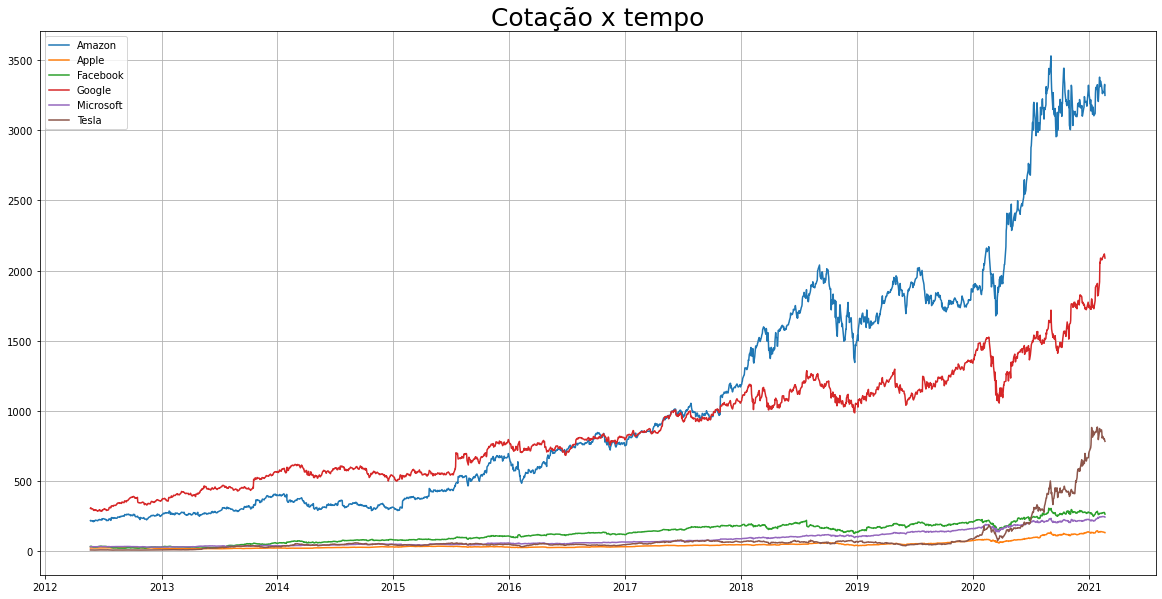

In [28]:
#Criação de um gráfico para visualização das ações ao longo do tempo
tickers = list(dfAcoesInv.drop(['Date'], axis = 1).columns)
plt.figure(figsize=(20,10))

for i in tickers:
    plt.plot(dfAcoesInv['Date'], dfAcoesInv[i])
plt.legend(tickers)
plt.grid()
plt.title("Cotação x tempo", fontsize = 25)
plt.show()

hide_toggle()

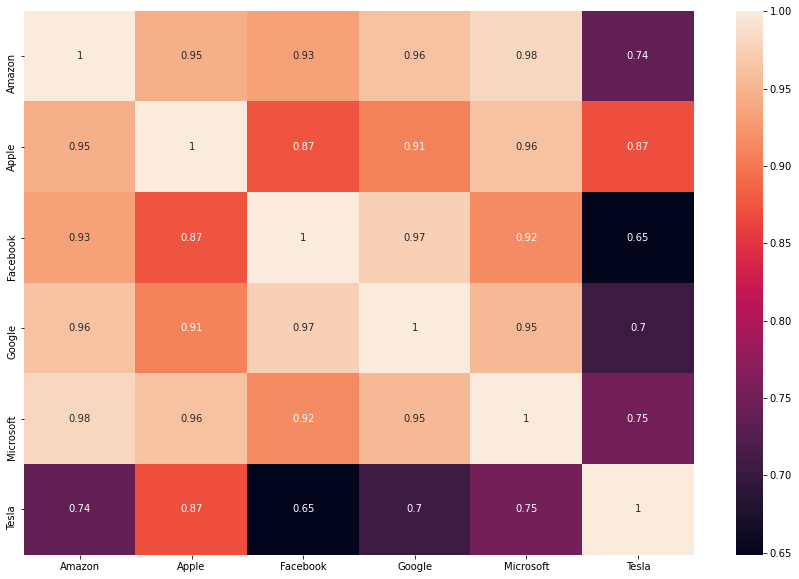

As maiores correlações ficam entre Amazon e Microsoft, e Google e Facebook


In [29]:
#Criação do gráfico de Heatmap para verificar a correlação entre as Ações
plt.figure(figsize=(15,10))
sns.heatmap(dfAcoesInv.corr(), annot = True)
plt.show()

print("As maiores correlações ficam entre Amazon e Microsoft, e Google e Facebook")

hide_toggle()

As maiores correlações ficam entre Amazon e Microsoft, e Google e Facebook

In [30]:
dfAcoes.describe()

,Amazon,Apple,Facebook,Google,Microsoft,Tesla
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1082.824358,41.105452,126.367045,868.053361,82.593297,84.419507
std,863.386929,26.968666,69.766175,380.933210,55.281397,134.699243
min,208.220000,13.947500,17.729000,282.401300,26.370000,5.220000
25%,338.640000,23.780000,72.830000,550.040000,41.720000,39.624000
50%,768.310000,31.502500,123.890000,800.710000,57.950000,48.820000
75%,1738.500000,47.762500,178.390000,1139.280000,109.080000,65.166000
max,3531.450000,143.160000,303.910000,2118.620000,244.990000,883.090000


### Retorno Diário

In [31]:
#Criação de um dataframe para verificar o retorno diário de cada Ação
returns = pd.DataFrame()
for i in tickers:
    returns[i] = dfAcoesInv[i].pct_change()
returns['Date'] = dfAcoesInv['Date']
returns.describe()

,Amazon,Apple,Facebook,Google,Microsoft,Tesla
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.001416,0.001016,0.001239,0.001005,0.001087,0.002811
std,0.019110,0.018028,0.023333,0.016050,0.016476,0.035003
min,-0.109972,-0.128647,-0.189609,-0.116342,-0.147390,-0.210628
25%,-0.007617,-0.007128,-0.009228,-0.006226,-0.006375,-0.014045
50%,0.001050,0.000761,0.001074,0.000806,0.000765,0.001433
75%,0.010934,0.010173,0.012106,0.008835,0.008727,0.018946
max,0.141311,0.119808,0.296077,0.162584,0.142169,0.244029


Duas informações importantes: Volatidade (std) e Retorno Diário Médio (mean)
A Tesla é que tem apresenta a maior volatilidade porém tem o maior retorno diário médio, e o Google a menor volatilidade porém tem o menor retorno diário médio.

In [32]:
returns

,Amazon,Apple,Facebook,Google,Microsoft,Tesla,Date
2200,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-22
2199,0.009056,0.024402,0.032258,0.014414,-0.021841,0.007470,2012-05-23
2198,-0.009389,-0.009187,0.032188,-0.009516,-0.001374,-0.022566,2012-05-24
2197,-0.010918,-0.005359,-0.033909,-0.020094,-0.000344,-0.016821,2012-05-25
2196,0.008737,0.017747,-0.096208,0.004750,0.017206,0.063066,2012-05-29
...,...,...,...,...,...,...,...
4,0.004776,0.001776,0.000407,0.003007,0.002045,0.005495,2021-02-12
3,-0.002673,-0.016104,0.012828,0.007480,-0.005266,-0.024384,2021-02-16
2,0.012142,-0.017644,-0.001460,0.003752,0.002052,0.002424,2021-02-17
1,0.005921,-0.008637,-0.015279,-0.006046,-0.001679,-0.013494,2021-02-18


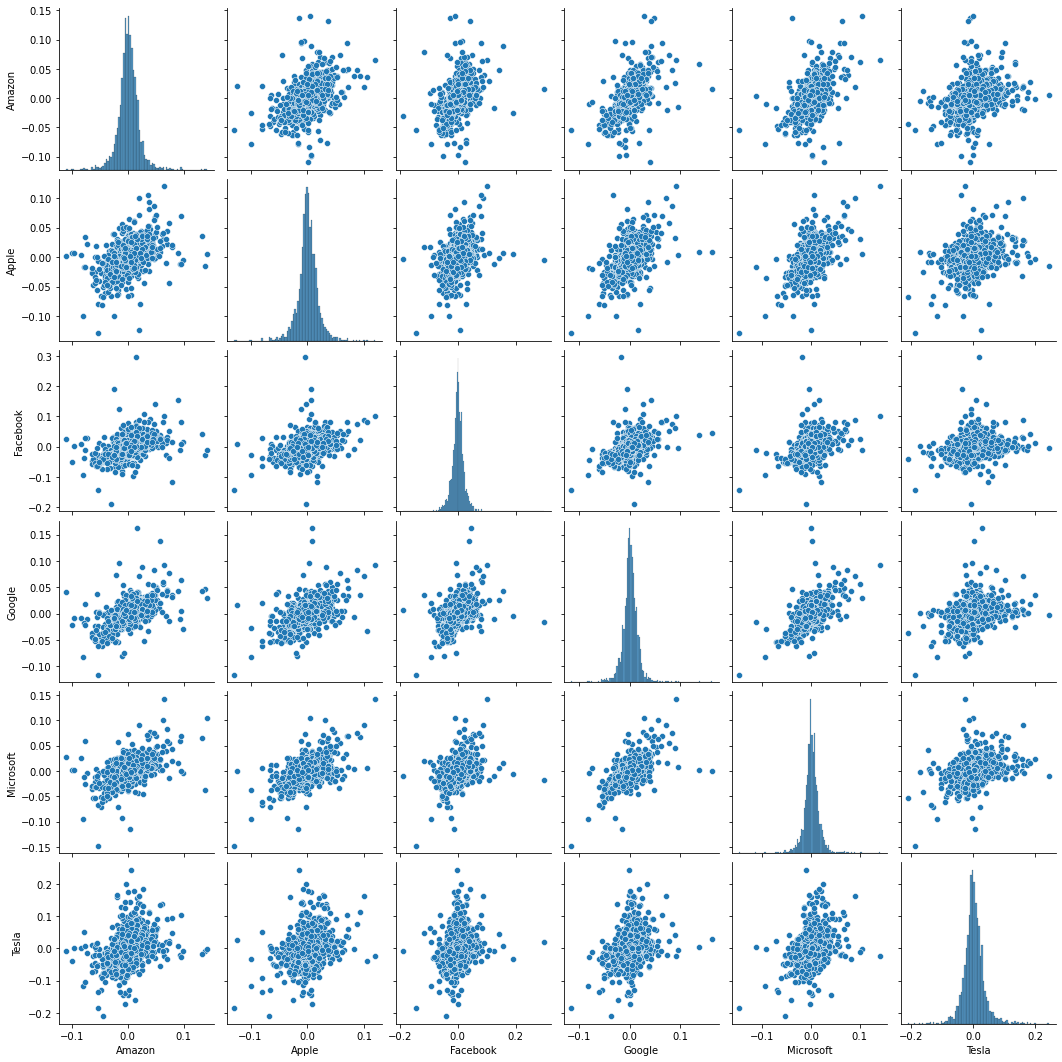

In [33]:
sns.pairplot(returns)
plt.show()

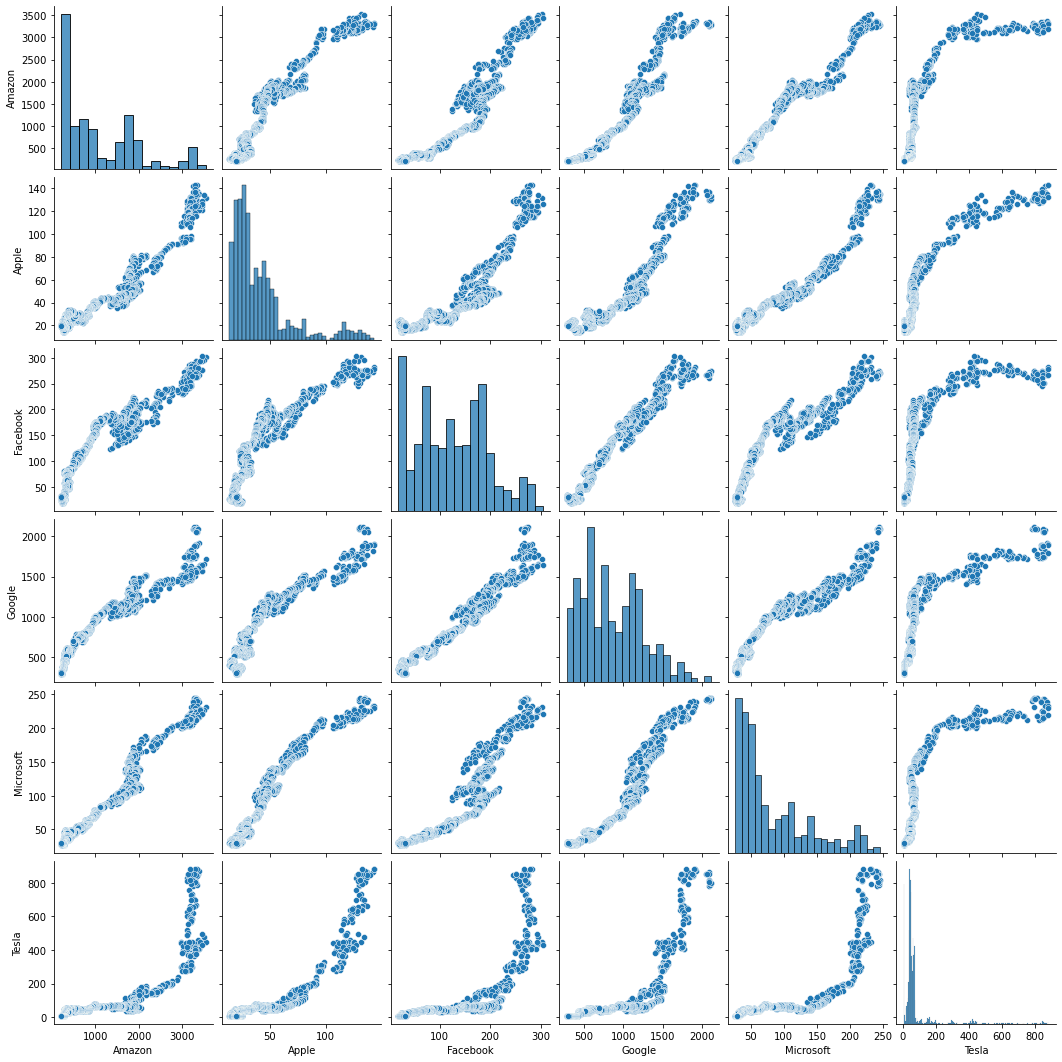

In [34]:
sns.pairplot(dfAcoes)
plt.show()

### Retorno acumulado
O retorno acumulado de um ativo é calculado multiplicando os retornos diários somados por 1. Por exemplo: o retorno acumulado de 3 dias em que uma ação subiu 2% é (1.02 x 1.02 x 1.02) = 1.0612.

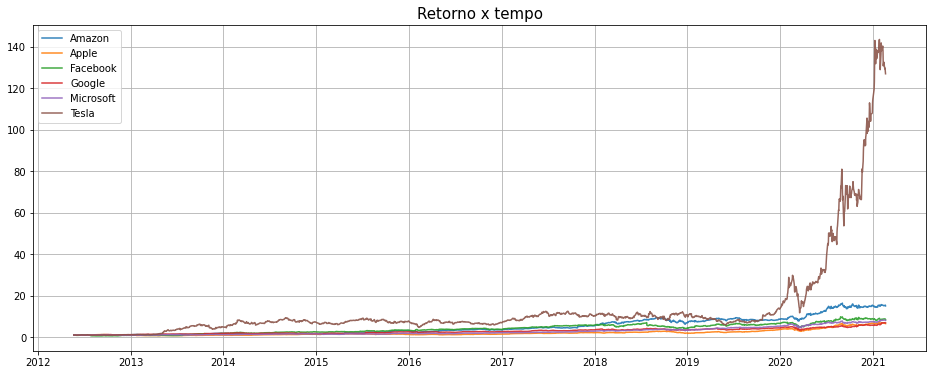

In [35]:
#Criação de um dataframe para visualização do retorno diário acumulado das Ações
return_sum = pd.DataFrame()
for ticker in tickers:
    return_sum[ticker] = (returns[ticker]+1).cumprod()
return_sum['Date'] = returns['Date']
plt.figure(figsize=(16,6))
plt.plot(return_sum['Date'], return_sum.drop(['Date'], axis = 1), alpha = 0.9)
plt.legend(tickers)
plt.title("Retorno x tempo", fontsize = 15)
plt.grid()
plt.show()

hide_toggle()

# Métricas de Desempenho


In [36]:
from collections import Counter
from math import log
from scipy.stats import entropy

def entropia(df, classe):
    
    if len(df) == 0:
        return 1.0

    classes = list(df[classe].unique())
    
    # se há apenas uma classe, a entropia é zero
    if len(classes) == 1:
        return 0
    else:
        prob = []
        contagem = Counter(df[classe])
        entropia = 0
        for classe, contagem_classe in contagem.items():
            prob.append(contagem_classe / len(df))
            #print(classe, prob)
            #entropia += prob * (log(prob, 2))
        return entropy(prob, base=2)

In [37]:
def ganho_informacao(df, classe):
    
    E_inicial = entropia(df, classe)
    
    atributos = list(df.columns)
    atributos.remove(classe)
    
    melhor_atributo = ""
    melhor_G = 0
    
    for atributo in atributos:
    
        media = df[atributo].mean()

        c1 = df[df[atributo] >= media].copy()
        c2 = df[df[atributo] < media].copy()

        E_c1 = entropia(c1, classe)
        E_c2 = entropia(c2, classe)

        print("Entropia C1", E_c1)
        print("Entropia C2", E_c2)

        E_c1 = E_c1 * (len(c1)/len(df))
        E_c2 = E_c2 * (len(c2)/len(df))

        print("Entropia C1 (normalizada)", E_c1)
        print("Entropia C2 (normalizada)", E_c2)    

        G = E_inicial - (E_c1 + E_c2)
        
        print("\tGanho", atributo, G)
        
        if G > melhor_G:
            melhor_G = G
            melhor_atributo = atributo
            
    return melhor_atributo

In [38]:
def plot_confusion_matrix(cm):

    ax= plt.subplot()
    sns.heatmap(cm, ax = ax, linewidths=0.1, linecolor='white', annot=True, fmt='d')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix')

    fig= plt.gcf()
    fig.set_size_inches(8, 6)

## Analise 01 - Valores Absolutos

In [39]:
dfAnalise01 = dfAcoes[['Date', 'Google']]

In [40]:
dfAnalise01['Menos1'] = dfAnalise01['Google'].shift(-1)
dfAnalise01['Menos2'] = dfAnalise01['Google'].shift(-2)
dfAnalise01['Menos3'] = dfAnalise01['Google'].shift(-3)
dfAnalise01['Menos4'] = dfAnalise01['Google'].shift(-4)
dfAnalise01['Menos5'] = dfAnalise01['Google'].shift(-5)
dfAnalise01['Menos6'] = dfAnalise01['Google'].shift(-6)
dfAnalise01['Menos7'] = dfAnalise01['Google'].shift(-7)

In [41]:
dfAnalise01['Classe'] = 'Não'
dfAnalise01['Classe'][dfAnalise01['Google'] - dfAnalise01['Menos1'] > 0] = 'Sim'

In [42]:
dfAnalise01

,Date,Google,Menos1,Menos2,Menos3,Menos4,Menos5,Menos6,Menos7,Classe
0,2021-02-19,2088.8100,2105.8100,2118.6200,2110.7000,2095.0300,2088.75,2086.48,2075.39,Não
1,2021-02-18,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.48,2075.39,2084.52,Não
2,2021-02-17,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.39,2084.52,2088.83,Sim
3,2021-02-16,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.52,2088.83,2053.63,Sim
4,2021-02-12,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.83,2053.63,2058.88,Sim
...,...,...,...,...,...,...,...,...,...,...
2196,2012-05-29,300.2278,298.8084,304.9358,307.8656,303.4911,NaN,NaN,NaN,Sim
2197,2012-05-25,298.8084,304.9358,307.8656,303.4911,NaN,NaN,NaN,NaN,Não
2198,2012-05-24,304.9358,307.8656,303.4911,NaN,NaN,NaN,NaN,NaN,Não
2199,2012-05-23,307.8656,303.4911,NaN,NaN,NaN,NaN,NaN,NaN,Sim


In [43]:
dfAnalise01 = dfAnalise01[:-7]

In [44]:
dfAnalise01

,Date,Google,Menos1,Menos2,Menos3,Menos4,Menos5,Menos6,Menos7,Classe
0,2021-02-19,2088.8100,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,Não
1,2021-02-18,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,Não
2,2021-02-17,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,Sim
3,2021-02-16,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,2053.6300,Sim
4,2021-02-12,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,2053.6300,2058.8800,Sim
...,...,...,...,...,...,...,...,...,...,...
2189,2012-06-07,292.0899,293.2720,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,Não
2190,2012-06-06,293.2720,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,Sim
2191,2012-06-05,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,304.9358,Não
2192,2012-06-04,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,304.9358,307.8656,Sim


In [45]:
X_treino01, y_treino01 = dfAnalise01[['Menos1','Menos2','Menos3','Menos4','Menos5','Menos6','Menos7']][200:], dfAnalise01[['Classe']][200:]
X_teste01, y_teste01 = dfAnalise01[['Menos1','Menos2','Menos3','Menos4','Menos5','Menos6','Menos7']][:200], dfAnalise01[['Classe']][:200]

In [46]:
model01 = DecisionTreeClassifier(random_state=0)
model01.fit(X_treino01, y_treino01)

DecisionTreeClassifier(random_state=0)

In [47]:
y_pred01 = model01.predict(X_teste01)
print("Acurácia: ", accuracy_score(y_teste01, y_pred01))

Acurácia:  0.48


In [48]:
r01 = export_text(model01, X_treino01.columns.tolist())
print(r01)

|--- Menos2 <= 285.20
|   |--- class: Sim
|--- Menos2 >  285.20
|   |--- Menos2 <= 288.48
|   |   |--- Menos4 <= 285.83
|   |   |   |--- Menos4 <= 282.82
|   |   |   |   |--- class: Não
|   |   |   |--- Menos4 >  282.82
|   |   |   |   |--- class: Sim
|   |   |--- Menos4 >  285.83
|   |   |   |--- class: Não
|   |--- Menos2 >  288.48
|   |   |--- Menos2 <= 293.59
|   |   |   |--- Menos3 <= 291.71
|   |   |   |   |--- class: Sim
|   |   |   |--- Menos3 >  291.71
|   |   |   |   |--- Menos3 <= 293.51
|   |   |   |   |   |--- Menos2 <= 293.22
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |--- Menos2 >  293.22
|   |   |   |   |   |   |--- class: Sim
|   |   |   |   |--- Menos3 >  293.51
|   |   |   |   |   |--- class: Sim
|   |   |--- Menos2 >  293.59
|   |   |   |--- Menos2 <= 298.36
|   |   |   |   |--- class: Não
|   |   |   |--- Menos2 >  298.36
|   |   |   |   |--- Menos1 <= 310.38
|   |   |   |   |   |--- class: Sim
|   |   |   |   |--- Menos1 >  310.38
|   |   |   |   

In [49]:
for max_depth in [2,3,4]:
    model01 = DecisionTreeClassifier(max_depth = max_depth)
    model01.fit(X_treino01, y_treino01)
    
    y_pred01 = model01.predict(X_treino01)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino01, y_pred01))
    
    y_pred01 = model01.predict(X_teste01)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste01, y_pred01))
    
    print()

Profundidade: 2 - Acurácia no treino 0.5295887662988967
Profundidade: 2 - Acurácia no teste 0.575

Profundidade: 3 - Acurácia no treino 0.5295887662988967
Profundidade: 3 - Acurácia no teste 0.575

Profundidade: 4 - Acurácia no treino 0.533099297893681
Profundidade: 4 - Acurácia no teste 0.575



In [50]:
model01 = DecisionTreeClassifier(max_depth = 2)
model01.fit(X_treino01, y_treino01)
y_pred01 = model01.predict(X_teste01)
print('Profundidade:', max_depth, '-', accuracy_score(y_teste01, y_pred01))

r01 = export_text(model01, X_treino01.columns.tolist())
print(r01)

Profundidade: 4 - 0.575
|--- Menos2 <= 285.20
|   |--- class: Sim
|--- Menos2 >  285.20
|   |--- Menos2 <= 288.48
|   |   |--- class: Não
|   |--- Menos2 >  288.48
|   |   |--- class: Sim



### Utilizando GridSearch para identificar os melhores parâmetros

In [51]:
param_grid01 = {
'criterion': ['gini', 'entropy'],
'max_depth': np.arange(1, 14),
'max_features': ['sqrt', 'log2']
}

grid01 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid01, cv = 5, verbose = 5, n_jobs = -1)
grid01.fit(X_treino01, y_treino01)

print(grid01.best_estimator_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.2s


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       random_state=0)


[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    6.8s finished


In [52]:
model01 = grid01.best_estimator_
model01.fit(X_treino01, y_treino01)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       random_state=0)

In [53]:
y_pred01 = model01.predict(X_teste01)
print("Acurácia: ", accuracy_score(y_teste01, y_pred01),"\n")

Acurácia:  0.495 



In [54]:
E_inicial = entropia(dfAnalise01[['Menos1','Menos2','Menos3','Menos4','Menos5','Menos6','Menos7','Classe']], 'Classe')
print("Entropia", E_inicial)

Entropia 0.9973075278699474


In [55]:
r01 = export_text(model01, X_treino01.columns.tolist())
print(r01)

|--- Menos5 <= 1511.73
|   |--- Menos4 <= 1482.42
|   |   |--- Menos7 <= 1484.43
|   |   |   |--- Menos3 <= 291.53
|   |   |   |   |--- Menos2 <= 285.20
|   |   |   |   |   |--- class: Sim
|   |   |   |   |--- Menos2 >  285.20
|   |   |   |   |   |--- Menos5 <= 284.34
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |--- Menos5 >  284.34
|   |   |   |   |   |   |--- Menos6 <= 290.13
|   |   |   |   |   |   |   |--- class: Sim
|   |   |   |   |   |   |--- Menos6 >  290.13
|   |   |   |   |   |   |   |--- class: Sim
|   |   |   |--- Menos3 >  291.53
|   |   |   |   |--- Menos4 <= 1477.54
|   |   |   |   |   |--- Menos7 <= 1392.79
|   |   |   |   |   |   |--- Menos4 <= 1226.88
|   |   |   |   |   |   |   |--- class: Sim
|   |   |   |   |   |   |--- Menos4 >  1226.88
|   |   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |--- Menos7 >  1392.79
|   |   |   |   |   |   |--- Menos7 <= 1460.21
|   |   |   |   |   |   |   |--- class: Sim
|   |   |   |   |   |   |--- Menos7 >

In [56]:
ganho_informacao(dfAnalise01[['Menos1','Menos2','Menos3','Menos4','Menos5','Menos6','Menos7','Classe']], 'Classe')

Entropia C1 0.9946570288430174
Entropia C2 0.9987574729812432
Entropia C1 (normalizada) 0.43748588552119955
Entropia C2 (normalizada) 0.5594680648559471
	Ganho Menos1 0.00035357749280062745
Entropia C1 0.9949117191936158
Entropia C2 0.9986580782030967
Entropia C1 (normalizada) 0.4375979074848857
Entropia C2 (normalizada) 0.5594123874711058
	Ganho Menos2 0.0002972329139558916
Entropia C1 0.9954023791952876
Entropia C2 0.9984478049590675
Entropia C1 (normalizada) 0.4378137173762318
Entropia C2 (normalizada) 0.5592945999520027
	Ganho Menos3 0.00019921054171290198
Entropia C1 0.9955118388915348
Entropia C2 0.998395456976805
Entropia C1 (normalizada) 0.4374081188201639
Entropia C2 (normalizada) 0.5597203336743255
	Ganho Menos4 0.00017907537545791552
Entropia C1 0.9955118388915348
Entropia C2 0.998395456976805
Entropia C1 (normalizada) 0.4374081188201639
Entropia C2 (normalizada) 0.5597203336743255
	Ganho Menos5 0.00017907537545791552
Entropia C1 0.9953832418365337
Entropia C2 0.998452846353

'Menos1'

              precision    recall  f1-score   support

         Não       0.44      0.73      0.55        85
         Sim       0.62      0.32      0.42       115

    accuracy                           0.49       200
   macro avg       0.53      0.53      0.49       200
weighted avg       0.54      0.49      0.48       200



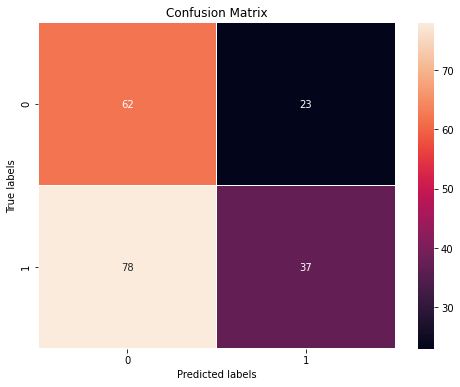

In [57]:
# Cria uma matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_teste01, y_pred01)

plt.figure()
plot_confusion_matrix(cnf_matrix)

print(metrics.classification_report(y_teste01, y_pred01))

hide_toggle()

In [58]:
for max_depth in [2,3,4]:
    model01 = DecisionTreeClassifier(max_depth = max_depth)
    model01.fit(X_treino01, y_treino01)
    
    y_pred01 = model01.predict(X_treino01)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino01, y_pred01))
    
    y_pred01 = model01.predict(X_teste01)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste01, y_pred01))
    
    vn, fp, fn, vp = confusion_matrix(y_teste01, y_pred01).ravel()
    print('VP:', vp)
    print('FP:', fp)
    print('VN:', vn)
    print('FN:', fn)
    print('---')

    p = vp / (vp + fp)
    r = vp / (vp + fn)
    fm = 2 * (p * r / (p + r))

    print(f'Precisão: {p}')
    print(f'Revocação: {r}')
    print(f'F-Medida: {fm}')
    print('\n')
    print('*'*30)
    print()
    
#hide_toggle()

Profundidade: 2 - Acurácia no treino 0.5295887662988967
Profundidade: 2 - Acurácia no teste 0.575
VP: 115
FP: 85
VN: 0
FN: 0
---
Precisão: 0.575
Revocação: 1.0
F-Medida: 0.7301587301587301


******************************

Profundidade: 3 - Acurácia no treino 0.5295887662988967
Profundidade: 3 - Acurácia no teste 0.575
VP: 115
FP: 85
VN: 0
FN: 0
---
Precisão: 0.575
Revocação: 1.0
F-Medida: 0.7301587301587301


******************************

Profundidade: 4 - Acurácia no treino 0.533099297893681
Profundidade: 4 - Acurácia no teste 0.575
VP: 115
FP: 85
VN: 0
FN: 0
---
Precisão: 0.575
Revocação: 1.0
F-Medida: 0.7301587301587301


******************************



## Analise 02 - Diferença Entre Dias

In [59]:
dfAnalise02 = dfAcoes[['Date', 'Google']]

In [60]:
dfAnalise02['Menos1'] = dfAnalise02['Google'].shift(-1)
dfAnalise02['Menos2'] = dfAnalise02['Google'].shift(-2)
dfAnalise02['Menos3'] = dfAnalise02['Google'].shift(-3)
dfAnalise02['Menos4'] = dfAnalise02['Google'].shift(-4)
dfAnalise02['Menos5'] = dfAnalise02['Google'].shift(-5)
dfAnalise02['Menos6'] = dfAnalise02['Google'].shift(-6)
dfAnalise02['Menos7'] = dfAnalise02['Google'].shift(-7)

In [61]:
dfAnalise02['Classe'] = 'Não'
dfAnalise02['Classe'][dfAnalise02['Google'] - dfAnalise02['Menos1'] > 0] = 'Sim'

In [62]:
dfAnalise02['Dif1'] = dfAnalise02['Google'] - dfAnalise02['Menos1']
dfAnalise02['Dif2'] = dfAnalise02['Google'] - dfAnalise02['Menos2']
dfAnalise02['Dif3'] = dfAnalise02['Google'] - dfAnalise02['Menos3']
dfAnalise02['Dif4'] = dfAnalise02['Google'] - dfAnalise02['Menos4']
dfAnalise02['Dif5'] = dfAnalise02['Google'] - dfAnalise02['Menos5']
dfAnalise02['Dif6'] = dfAnalise02['Google'] - dfAnalise02['Menos6']
dfAnalise02['Dif7'] = dfAnalise02['Google'] - dfAnalise02['Menos7']

In [63]:
dfAnalise02

,Date,Google,Menos1,Menos2,Menos3,Menos4,Menos5,Menos6,Menos7,Classe,Dif1,Dif2,Dif3,Dif4,Dif5,Dif6,Dif7
0,2021-02-19,2088.8100,2105.8100,2118.6200,2110.7000,2095.0300,2088.75,2086.48,2075.39,Não,-17.0000,-29.8100,-21.8900,-6.2200,0.06,2.33,13.42
1,2021-02-18,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.48,2075.39,2084.52,Não,-12.8100,-4.8900,10.7800,17.0600,19.33,30.42,21.29
2,2021-02-17,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.39,2084.52,2088.83,Sim,7.9200,23.5900,29.8700,32.1400,43.23,34.10,29.79
3,2021-02-16,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.52,2088.83,2053.63,Sim,15.6700,21.9500,24.2200,35.3100,26.18,21.87,57.07
4,2021-02-12,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.83,2053.63,2058.88,Sim,6.2800,8.5500,19.6400,10.5100,6.20,41.40,36.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2012-05-29,300.2278,298.8084,304.9358,307.8656,303.4911,NaN,NaN,NaN,Sim,1.4194,-4.7080,-7.6378,-3.2633,NaN,NaN,NaN
2197,2012-05-25,298.8084,304.9358,307.8656,303.4911,NaN,NaN,NaN,NaN,Não,-6.1274,-9.0572,-4.6827,NaN,NaN,NaN,NaN
2198,2012-05-24,304.9358,307.8656,303.4911,NaN,NaN,NaN,NaN,NaN,Não,-2.9298,1.4447,NaN,NaN,NaN,NaN,NaN
2199,2012-05-23,307.8656,303.4911,NaN,NaN,NaN,NaN,NaN,NaN,Sim,4.3745,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
dfAnalise02 = dfAnalise02[:-7]

In [65]:
dfAnalise02

,Date,Google,Menos1,Menos2,Menos3,Menos4,Menos5,Menos6,Menos7,Classe,Dif1,Dif2,Dif3,Dif4,Dif5,Dif6,Dif7
0,2021-02-19,2088.8100,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,Não,-17.0000,-29.8100,-21.8900,-6.2200,0.0600,2.3300,13.4200
1,2021-02-18,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,Não,-12.8100,-4.8900,10.7800,17.0600,19.3300,30.4200,21.2900
2,2021-02-17,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,Sim,7.9200,23.5900,29.8700,32.1400,43.2300,34.1000,29.7900
3,2021-02-16,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,2053.6300,Sim,15.6700,21.9500,24.2200,35.3100,26.1800,21.8700,57.0700
4,2021-02-12,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,2053.6300,2058.8800,Sim,6.2800,8.5500,19.6400,10.5100,6.2000,41.4000,36.1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2012-06-07,292.0899,293.2720,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,Não,-1.1821,3.9502,-0.1819,3.6623,-1.3286,-5.0515,-8.1379
2190,2012-06-06,293.2720,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,Sim,5.1323,1.0002,4.8444,-0.1465,-3.8694,-6.9558,-5.5364
2191,2012-06-05,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,304.9358,Não,-4.1321,-0.2879,-5.2788,-9.0017,-12.0881,-10.6687,-16.7961
2192,2012-06-04,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,304.9358,307.8656,Sim,3.8442,-1.1467,-4.8696,-7.9560,-6.5366,-12.6640,-15.5938


In [66]:
X_treino02, y_treino02 = dfAnalise02[['Dif2','Dif3','Dif4','Dif5','Dif6','Dif7']][200:], dfAnalise02[['Classe']][200:]
X_teste02, y_teste02 = dfAnalise02[['Dif2','Dif3','Dif4','Dif5','Dif6','Dif7']][:200], dfAnalise02[['Classe']][:200]

In [67]:
model02 = DecisionTreeClassifier(random_state=0)
model02.fit(X_treino02, y_treino02)

DecisionTreeClassifier(random_state=0)

In [68]:
y_pred02 = model02.predict(X_teste02)
print("Acurácia: ", accuracy_score(y_teste02, y_pred02))

Acurácia:  0.62


In [69]:
r02 = export_text(model02, X_treino02.columns.tolist())
print(r02)

|--- Dif2 <= 1.00
|   |--- Dif2 <= -4.27
|   |   |--- Dif3 <= -1.35
|   |   |   |--- Dif2 <= -8.56
|   |   |   |   |--- Dif4 <= 86.28
|   |   |   |   |   |--- Dif5 <= -20.65
|   |   |   |   |   |   |--- Dif6 <= -16.93
|   |   |   |   |   |   |   |--- Dif7 <= 41.27
|   |   |   |   |   |   |   |   |--- Dif6 <= -55.58
|   |   |   |   |   |   |   |   |   |--- Dif2 <= -53.13
|   |   |   |   |   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |   |   |   |   |--- Dif2 >  -53.13
|   |   |   |   |   |   |   |   |   |   |--- Dif6 <= -98.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Dif6 >  -98.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |--- Dif6 >  -55.58
|   |   |   |   |   |   |   |   |   |--- Dif3 <= -15.14
|   |   |   |   |   |   |   |   |   |   |--- Dif2 <= -20.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dept

In [70]:
for max_depth in [2,3,4]:
    model02 = DecisionTreeClassifier(max_depth = max_depth)
    model02.fit(X_treino02, y_treino02)
    
    y_pred02 = model02.predict(X_treino02)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino02, y_pred02))
    
    y_pred02 = model02.predict(X_teste02)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste02, y_pred02))
    
    print()

Profundidade: 2 - Acurácia no treino 0.7552657973921765
Profundidade: 2 - Acurácia no teste 0.73

Profundidade: 3 - Acurácia no treino 0.7567703109327983
Profundidade: 3 - Acurácia no teste 0.73

Profundidade: 4 - Acurácia no treino 0.7627883650952858
Profundidade: 4 - Acurácia no teste 0.73



In [71]:
model02 = DecisionTreeClassifier(max_depth = 2)
model02.fit(X_treino02, y_treino02)
y_pred02 = model02.predict(X_teste02)
print('Profundidade:', max_depth, '-', accuracy_score(y_teste02, y_pred02))

r02 = export_text(model02, X_treino02.columns.tolist())
print(r02)

Profundidade: 4 - 0.73
|--- Dif2 <= 1.00
|   |--- Dif2 <= -4.27
|   |   |--- class: Não
|   |--- Dif2 >  -4.27
|   |   |--- class: Não
|--- Dif2 >  1.00
|   |--- Dif2 <= 8.88
|   |   |--- class: Sim
|   |--- Dif2 >  8.88
|   |   |--- class: Sim



### Utilizando GridSearch para identificar os melhores parâmetros

In [72]:
param_grid02 = {
'criterion': ['gini', 'entropy'],
'max_depth': np.arange(1, 14),
'max_features': ['sqrt', 'log2']
}

grid02 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid02, cv = 5, verbose = 5, n_jobs = -1)
grid02.fit(X_treino02, y_treino02)

print(grid02.best_estimator_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s


DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=0)


[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.7s finished


In [73]:
model02 = grid02.best_estimator_
model02.fit(X_treino02, y_treino02)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=0)

In [74]:
y_pred02 = model02.predict(X_teste02)
print("Acurácia: ", accuracy_score(y_teste02, y_pred02),"\n")

Acurácia:  0.74 



In [75]:
E_inicial = entropia(dfAnalise02[['Dif2','Dif3','Dif4','Dif5','Dif6','Dif7', 'Classe']], 'Classe')
print("Entropia", E_inicial)

Entropia 0.9973075278699474


In [76]:
r02 = export_text(model02, X_treino02.columns.tolist())
print(r02)

|--- Dif3 <= -1.46
|   |--- Dif2 <= -2.16
|   |   |--- Dif2 <= -8.56
|   |   |   |--- class: Não
|   |   |--- Dif2 >  -8.56
|   |   |   |--- class: Não
|   |--- Dif2 >  -2.16
|   |   |--- Dif5 <= -13.58
|   |   |   |--- class: Sim
|   |   |--- Dif5 >  -13.58
|   |   |   |--- class: Sim
|--- Dif3 >  -1.46
|   |--- Dif2 <= 1.00
|   |   |--- Dif4 <= -55.75
|   |   |   |--- class: Sim
|   |   |--- Dif4 >  -55.75
|   |   |   |--- class: Não
|   |--- Dif2 >  1.00
|   |   |--- Dif2 <= 8.08
|   |   |   |--- class: Sim
|   |   |--- Dif2 >  8.08
|   |   |   |--- class: Sim



In [77]:
ganho_informacao(dfAnalise02[['Dif2','Dif3','Dif4','Dif5','Dif6','Dif7', 'Classe']], 'Classe')


Entropia C1 0.7627196518567233
Entropia C2 0.8664998383682041
Entropia C1 (normalizada) 0.37684052078973934
Entropia C2 (normalizada) 0.43838414794380426
	Ganho Dif2 0.18208285913640376
Entropia C1 0.8547031220825355
Entropia C2 0.9259807057381693
Entropia C1 (normalizada) 0.42657243330919614
Entropia C2 (normalizada) 0.46383445560904646
	Ganho Dif3 0.10690063895170476
Entropia C1 0.895777639060456
Entropia C2 0.9542666563120944
Entropia C1 (normalizada) 0.4458473937347393
Entropia C2 (normalizada) 0.479308047062866
	Ganho Dif4 0.07215208707234211
Entropia C1 0.9188931159173893
Entropia C2 0.9652759111691448
Entropia C1 (normalizada) 0.4665665137338066
Entropia C2 (normalizada) 0.475158607138868
	Ganho Dif5 0.05558240699727279
Entropia C1 0.930876925892757
Entropia C2 0.9759112091844566
Entropia C1 (normalizada) 0.4628927648810382
Entropia C2 (normalizada) 0.49062445931196697
	Ganho Dif6 0.043790303676942144
Entropia C1 0.9417888452279947
Entropia C2 0.9829050459851405
Entropia C1 (nor

'Dif2'

              precision    recall  f1-score   support

         Não       0.69      0.72      0.70        85
         Sim       0.78      0.76      0.77       115

    accuracy                           0.74       200
   macro avg       0.73      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



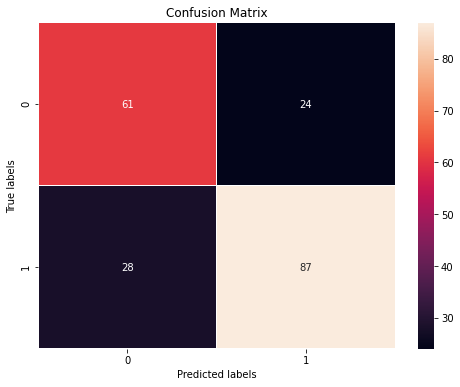

In [78]:
# Cria uma matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_teste02, y_pred02)

plt.figure()
plot_confusion_matrix(cnf_matrix)

print(metrics.classification_report(y_teste02, y_pred02))

hide_toggle()

In [79]:
for max_depth in [2,3,4]:
    model02 = DecisionTreeClassifier(max_depth = max_depth)
    model02.fit(X_treino02, y_treino02)
    
    y_pred02 = model02.predict(X_treino02)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino02, y_pred02))
    
    y_pred02 = model02.predict(X_teste02)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste02, y_pred02))
    
    vn, fp, fn, vp = confusion_matrix(y_teste02, y_pred02).ravel()
    print('VP:', vp)
    print('FP:', fp)
    print('VN:', vn)
    print('FN:', fn)
    print('---')

    p = vp / (vp + fp)
    r = vp / (vp + fn)
    fm = 2 * (p * r / (p + r))

    print(f'Precisão: {p}')
    print(f'Revocação: {r}')
    print(f'F-Medida: {fm}')
    print('\n')
    print('*'*30)
    print()

Profundidade: 2 - Acurácia no treino 0.7552657973921765
Profundidade: 2 - Acurácia no teste 0.73
VP: 85
FP: 24
VN: 61
FN: 30
---
Precisão: 0.7798165137614679
Revocação: 0.7391304347826086
F-Medida: 0.7589285714285714


******************************

Profundidade: 3 - Acurácia no treino 0.7567703109327983
Profundidade: 3 - Acurácia no teste 0.73
VP: 86
FP: 25
VN: 60
FN: 29
---
Precisão: 0.7747747747747747
Revocação: 0.7478260869565218
F-Medida: 0.7610619469026548


******************************

Profundidade: 4 - Acurácia no treino 0.7627883650952858
Profundidade: 4 - Acurácia no teste 0.73
VP: 88
FP: 27
VN: 58
FN: 27
---
Precisão: 0.7652173913043478
Revocação: 0.7652173913043478
F-Medida: 0.7652173913043478


******************************



## Analise 03 - Variação para Cima ou para Baixo

In [80]:
dfAnalise03 = dfAcoes[['Date', 'Google']]

In [81]:
dfAnalise03['Menos1'] = dfAnalise03['Google'].shift(-1)
dfAnalise03['Menos2'] = dfAnalise03['Google'].shift(-2)
dfAnalise03['Menos3'] = dfAnalise03['Google'].shift(-3)
dfAnalise03['Menos4'] = dfAnalise03['Google'].shift(-4)
dfAnalise03['Menos5'] = dfAnalise03['Google'].shift(-5)
dfAnalise03['Menos6'] = dfAnalise03['Google'].shift(-6)
dfAnalise03['Menos7'] = dfAnalise03['Google'].shift(-7)

In [82]:
dfAnalise03['Classe'] = 'Não'
dfAnalise03['Classe'][dfAnalise03['Google'] - dfAnalise03['Menos1'] > 0] = 'Sim'

In [83]:
dfAnalise03['Var1'] = dfAnalise03['Google'] > dfAnalise03['Menos1']
dfAnalise03['Var2'] = dfAnalise03['Google'] > dfAnalise03['Menos2']
dfAnalise03['Var3'] = dfAnalise03['Google'] > dfAnalise03['Menos3']
dfAnalise03['Var4'] = dfAnalise03['Google'] > dfAnalise03['Menos4']
dfAnalise03['Var5'] = dfAnalise03['Google'] > dfAnalise03['Menos5']
dfAnalise03['Var6'] = dfAnalise03['Google'] > dfAnalise03['Menos6']
dfAnalise03['Var7'] = dfAnalise03['Google'] > dfAnalise03['Menos7']

In [84]:
dfAnalise03

,Date,Google,Menos1,Menos2,Menos3,Menos4,Menos5,Menos6,Menos7,Classe,Var1,Var2,Var3,Var4,Var5,Var6,Var7
0,2021-02-19,2088.8100,2105.8100,2118.6200,2110.7000,2095.0300,2088.75,2086.48,2075.39,Não,False,False,False,False,True,True,True
1,2021-02-18,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.48,2075.39,2084.52,Não,False,False,True,True,True,True,True
2,2021-02-17,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.39,2084.52,2088.83,Sim,True,True,True,True,True,True,True
3,2021-02-16,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.52,2088.83,2053.63,Sim,True,True,True,True,True,True,True
4,2021-02-12,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.83,2053.63,2058.88,Sim,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2012-05-29,300.2278,298.8084,304.9358,307.8656,303.4911,NaN,NaN,NaN,Sim,True,False,False,False,False,False,False
2197,2012-05-25,298.8084,304.9358,307.8656,303.4911,NaN,NaN,NaN,NaN,Não,False,False,False,False,False,False,False
2198,2012-05-24,304.9358,307.8656,303.4911,NaN,NaN,NaN,NaN,NaN,Não,False,True,False,False,False,False,False
2199,2012-05-23,307.8656,303.4911,NaN,NaN,NaN,NaN,NaN,NaN,Sim,True,False,False,False,False,False,False


In [85]:
dfAnalise03 = dfAnalise03[:-7]

In [86]:
dfAnalise03

,Date,Google,Menos1,Menos2,Menos3,Menos4,Menos5,Menos6,Menos7,Classe,Var1,Var2,Var3,Var4,Var5,Var6,Var7
0,2021-02-19,2088.8100,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,Não,False,False,False,False,True,True,True
1,2021-02-18,2105.8100,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,Não,False,False,True,True,True,True,True
2,2021-02-17,2118.6200,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,Sim,True,True,True,True,True,True,True
3,2021-02-16,2110.7000,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,2053.6300,Sim,True,True,True,True,True,True,True
4,2021-02-12,2095.0300,2088.7500,2086.4800,2075.3900,2084.5200,2088.8300,2053.6300,2058.8800,Sim,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2012-06-07,292.0899,293.2720,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,Não,False,True,False,True,False,False,False
2190,2012-06-06,293.2720,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,Sim,True,True,True,False,False,False,False
2191,2012-06-05,288.1397,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,304.9358,Não,False,False,False,False,False,False,False
2192,2012-06-04,292.2718,288.4276,293.4185,297.1414,300.2278,298.8084,304.9358,307.8656,Sim,True,False,False,False,False,False,False


In [87]:
X_treino03, y_treino03 = dfAnalise03[['Var2','Var3','Var4','Var5','Var6','Var7']][200:], dfAnalise03[['Classe']][200:]
X_teste03, y_teste03 = dfAnalise03[['Var2','Var3','Var4','Var5','Var6','Var7']][:200], dfAnalise03[['Classe']][:200]

In [88]:
model03 = DecisionTreeClassifier(random_state=0)
model03.fit(X_treino03, y_treino03)

DecisionTreeClassifier(random_state=0)

In [89]:
y_pred03 = model03.predict(X_teste03)
print("Acurácia: ", accuracy_score(y_teste03, y_pred03))

0.72


In [90]:
r03 = export_text(model03, X_treino03.columns.tolist())
print(r03)

|--- Var2 <= 0.50
|   |--- Var3 <= 0.50
|   |   |--- Var5 <= 0.50
|   |   |   |--- Var4 <= 0.50
|   |   |   |   |--- Var6 <= 0.50
|   |   |   |   |   |--- Var7 <= 0.50
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |--- Var7 >  0.50
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |--- Var6 >  0.50
|   |   |   |   |   |--- Var7 <= 0.50
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |--- Var7 >  0.50
|   |   |   |   |   |   |--- class: Não
|   |   |   |--- Var4 >  0.50
|   |   |   |   |--- Var6 <= 0.50
|   |   |   |   |   |--- Var7 <= 0.50
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |--- Var7 >  0.50
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |--- Var6 >  0.50
|   |   |   |   |   |--- Var7 <= 0.50
|   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |--- Var7 >  0.50
|   |   |   |   |   |   |--- class: Não
|   |   |--- Var5 >  0.50
|   |   |   |--- Var6 <= 0.50
|   |   |   |   |--- Var7 <= 0.50
|   |   |   |   |   |---

In [91]:
for max_depth in [2,3,4]:
    model03 = DecisionTreeClassifier(max_depth = max_depth)
    model03.fit(X_treino03, y_treino03)
    
    y_pred03 = model03.predict(X_treino03)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino03, y_pred03))
    
    y_pred03 = model03.predict(X_teste03)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste03, y_pred03))
    
    print()

Profundidade: 2 - Acurácia no treino 0.7502507522567703
Profundidade: 2 - Acurácia no teste 0.735

Profundidade: 3 - Acurácia no treino 0.7502507522567703
Profundidade: 3 - Acurácia no teste 0.735

Profundidade: 4 - Acurácia no treino 0.7502507522567703
Profundidade: 4 - Acurácia no teste 0.735



In [92]:
model03 = DecisionTreeClassifier(max_depth = 2)
model03.fit(X_treino03, y_treino03)
y_pred03 = model03.predict(X_teste03)
print('Profundidade:', max_depth, '-', accuracy_score(y_teste03, y_pred03))

r03 = export_text(model03, X_treino03.columns.tolist())
print(r03)

Profundidade: 4 - 0.735
|--- Var2 <= 0.50
|   |--- Var3 <= 0.50
|   |   |--- class: Não
|   |--- Var3 >  0.50
|   |   |--- class: Não
|--- Var2 >  0.50
|   |--- Var5 <= 0.50
|   |   |--- class: Sim
|   |--- Var5 >  0.50
|   |   |--- class: Sim



### Utilizando GridSearch para identificar os melhores parâmetros

In [93]:
param_grid03 = {
'criterion': ['gini', 'entropy'],
'max_depth': np.arange(1, 14),
'max_features': ['sqrt', 'log2']
}

grid03 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid03, cv = 5, verbose = 5, n_jobs = -1)
grid03.fit(X_treino03, y_treino03)

print(grid03.best_estimator_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=0)


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.5s finished


In [94]:
model03 = grid03.best_estimator_
model03.fit(X_treino03, y_treino03)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=0)

In [95]:
y_pred03 = model03.predict(X_teste03)
print("Acurácia: ", accuracy_score(y_teste03, y_pred03),"\n")

Acurácia:  0.735 



In [96]:
E_inicial = entropia(dfAnalise03[['Var2','Var3','Var4','Var5','Var6','Var7', 'Classe']], 'Classe')
print("Entropia", E_inicial)

Entropia 0.9973075278699474


In [97]:
r03 = export_text(model03, X_treino03.columns.tolist())
print(r03)

|--- Var3 <= 0.50
|   |--- Var2 <= 0.50
|   |   |--- class: Não
|   |--- Var2 >  0.50
|   |   |--- class: Sim
|--- Var3 >  0.50
|   |--- Var2 <= 0.50
|   |   |--- class: Não
|   |--- Var2 >  0.50
|   |   |--- class: Sim



In [98]:
ganho_informacao(dfAnalise03[['Var2','Var3','Var4','Var5','Var6','Var7', 'Classe']], 'Classe')


Entropia C1 0.8042993727284339
Entropia C2 0.8234635803385579
Entropia C1 (normalizada) 0.4417414512934197
Entropia C2 (normalizada) 0.37119666406327884
	Ganho Var2 0.1843694125132488
Entropia C1 0.8762232467418807
Entropia C2 0.8967667681126673
Entropia C1 (normalizada) 0.4872344398473538
Entropia C2 (normalizada) 0.3981088569470091
	Ganho Var3 0.11196423107558451
Entropia C1 0.9234679695769881
Entropia C2 0.935552488833995
Entropia C1 (normalizada) 0.5332880207174311
Entropia C2 (normalizada) 0.39528585102512004
	Ganho Var4 0.06873365612739624
Entropia C1 0.9358251338743196
Entropia C2 0.9458220225686961
Entropia C1 (normalizada) 0.548954852915337
Entropia C2 (normalizada) 0.39100299656782467
	Ganho Var5 0.05734967838678573
Entropia C1 0.9496736738694606
Entropia C2 0.9624966781027643
Entropia C1 (normalizada) 0.5588098053625677
Entropia C2 (normalizada) 0.3961415224825871
	Ganho Var6 0.042356200024792456
Entropia C1 0.9543634922175579
Entropia C2 0.9655736141972248
Entropia C1 (norm

'Var2'

              precision    recall  f1-score   support

         Não       0.68      0.72      0.70        85
         Sim       0.78      0.75      0.76       115

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.74       200



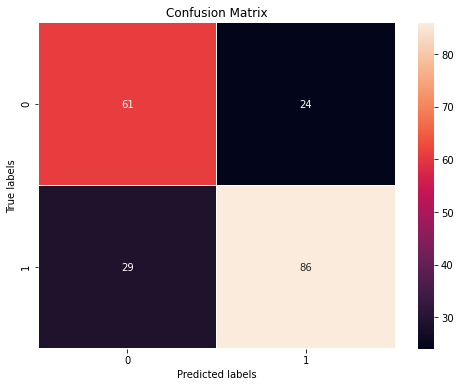

In [99]:
# Cria uma matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_teste03, y_pred03)

plt.figure()
plot_confusion_matrix(cnf_matrix)

print(metrics.classification_report(y_teste03, y_pred03))

hide_toggle()

In [100]:
for max_depth in [2,3,4]:
    model03 = DecisionTreeClassifier(max_depth = max_depth)
    model03.fit(X_treino03, y_treino03)
    
    y_pred03 = model03.predict(X_treino03)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino03, y_pred03))
    
    y_pred03 = model03.predict(X_teste03)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste03, y_pred03))
    
    vn, fp, fn, vp = confusion_matrix(y_teste03, y_pred03).ravel()
    print('VP:', vp)
    print('FP:', fp)
    print('VN:', vn)
    print('FN:', fn)
    print('---')

    p = vp / (vp + fp)
    r = vp / (vp + fn)
    fm = 2 * (p * r / (p + r))

    print(f'Precisão: {p}')
    print(f'Revocação: {r}')
    print(f'F-Medida: {fm}')
    print('\n')
    print('*'*30)
    print()

Profundidade: 2 - Acurácia no treino 0.7502507522567703
Profundidade: 2 - Acurácia no teste 0.735
VP: 86
FP: 24
VN: 61
FN: 29
---
Precisão: 0.7818181818181819
Revocação: 0.7478260869565218
F-Medida: 0.7644444444444444


******************************

Profundidade: 3 - Acurácia no treino 0.7502507522567703
Profundidade: 3 - Acurácia no teste 0.735
VP: 86
FP: 24
VN: 61
FN: 29
---
Precisão: 0.7818181818181819
Revocação: 0.7478260869565218
F-Medida: 0.7644444444444444


******************************

Profundidade: 4 - Acurácia no treino 0.7502507522567703
Profundidade: 4 - Acurácia no teste 0.735
VP: 86
FP: 24
VN: 61
FN: 29
---
Precisão: 0.7818181818181819
Revocação: 0.7478260869565218
F-Medida: 0.7644444444444444


******************************



## Analise 04 - Comparando as Ações do Google com as do Facebook

In [101]:
dfAnalise04 = dfAcoes[['Date', 'Google', 'Facebook']]

In [102]:
dfAnalise04['GgMenos1'] = dfAnalise04['Google'].shift(-1)
dfAnalise04['FbMenos1'] = dfAnalise04['Facebook'].shift(-1)

In [103]:
dfAnalise04['ClasseGoogle'] = 'Não'
dfAnalise04['ClasseGoogle'][dfAnalise04['Google'] - dfAnalise04['GgMenos1'] > 0] = 'Sim'
dfAnalise04['ClasseFacebook'] = 'Não'
dfAnalise04['ClasseFacebook'][dfAnalise04['Facebook'] - dfAnalise04['FbMenos1'] > 0] = 'Sim'

In [104]:
dfAnalise04['GgVar1'] = dfAnalise04['Google'] > dfAnalise04['GgMenos1']
dfAnalise04['FbVar1'] = dfAnalise04['Facebook'] > dfAnalise04['FbMenos1']

In [105]:
dfAnalise04['Google_x_Facebook'] = False
dfAnalise04['Google_x_Facebook'][(dfAnalise04['GgVar1'] == True) & (dfAnalise04['FbVar1'] == True)] = True

In [106]:
dfAnalise04 = dfAnalise04[:-1]

In [107]:
dfAnalise04

,Date,Google,Facebook,GgMenos1,FbMenos1,ClasseGoogle,ClasseFacebook,GgVar1,FbVar1,Google_x_Facebook
0,2021-02-19,2088.8100,261.56,2105.8100,269.39,Não,Não,False,False,False
1,2021-02-18,2105.8100,269.39,2118.6200,273.57,Não,Não,False,False,False
2,2021-02-17,2118.6200,273.57,2110.7000,273.97,Sim,Não,True,False,False
3,2021-02-16,2110.7000,273.97,2095.0300,270.50,Sim,Sim,True,True,True
4,2021-02-12,2095.0300,270.50,2088.7500,270.39,Sim,Sim,True,True,True
...,...,...,...,...,...,...,...,...,...,...
2195,2012-05-30,297.1414,28.19,300.2278,28.84,Não,Não,False,False,False
2196,2012-05-29,300.2278,28.84,298.8084,31.91,Sim,Não,True,False,False
2197,2012-05-25,298.8084,31.91,304.9358,33.03,Não,Não,False,False,False
2198,2012-05-24,304.9358,33.03,307.8656,32.00,Não,Sim,False,True,False


In [108]:
X_treino04, y_treino04 = dfAnalise04[['GgMenos1', 'Google_x_Facebook']][200:], dfAnalise04[['ClasseGoogle']][200:]
X_teste04, y_teste04 = dfAnalise04[['GgMenos1', 'Google_x_Facebook']][:200], dfAnalise04[['ClasseGoogle']][:200]

In [109]:
model04 = DecisionTreeClassifier(random_state=0)
model04.fit(X_treino04, y_treino04)

DecisionTreeClassifier(random_state=0)

In [110]:
y_pred04 = model04.predict(X_teste04)
print("Acurácia: ", accuracy_score(y_teste04, y_pred04))

0.865


In [111]:
r04 = export_text(model04, X_treino04.columns.tolist())
print(r04)

|--- Google_x_Facebook <= 0.50
|   |--- GgMenos1 <= 441.23
|   |   |--- GgMenos1 <= 440.16
|   |   |   |--- GgMenos1 <= 407.25
|   |   |   |   |--- GgMenos1 <= 406.35
|   |   |   |   |   |--- GgMenos1 <= 285.35
|   |   |   |   |   |   |--- GgMenos1 <= 284.25
|   |   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |   |--- GgMenos1 >  284.25
|   |   |   |   |   |   |   |--- class: Sim
|   |   |   |   |   |--- GgMenos1 >  285.35
|   |   |   |   |   |   |--- GgMenos1 <= 287.88
|   |   |   |   |   |   |   |--- class: Não
|   |   |   |   |   |   |--- GgMenos1 >  287.88
|   |   |   |   |   |   |   |--- GgMenos1 <= 288.48
|   |   |   |   |   |   |   |   |--- class: Sim
|   |   |   |   |   |   |   |--- GgMenos1 >  288.48
|   |   |   |   |   |   |   |   |--- GgMenos1 <= 297.97
|   |   |   |   |   |   |   |   |   |--- GgMenos1 <= 293.39
|   |   |   |   |   |   |   |   |   |   |--- GgMenos1 <= 293.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   

In [112]:
for max_depth in [2,3,4]:
    model04 = DecisionTreeClassifier(max_depth = max_depth)
    model04.fit(X_treino04, y_treino04)
    
    y_pred04 = model04.predict(X_treino04)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino04, y_pred04))
    
    y_pred04 = model04.predict(X_teste04)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste04, y_pred04))
    
    print()

Profundidade: 2 - Acurácia no treino 0.853
Profundidade: 2 - Acurácia no teste 0.88

Profundidade: 3 - Acurácia no treino 0.854
Profundidade: 3 - Acurácia no teste 0.88

Profundidade: 4 - Acurácia no treino 0.855
Profundidade: 4 - Acurácia no teste 0.885



In [113]:
model04 = DecisionTreeClassifier(max_depth = 2)
model04.fit(X_treino04, y_treino04)
y_pred04 = model04.predict(X_teste04)
print('Profundidade:', max_depth, '-', accuracy_score(y_teste04, y_pred04))

r04 = export_text(model04, X_treino04.columns.tolist())
print(r04)

Profundidade: 4 - 0.88
|--- Google_x_Facebook <= 0.50
|   |--- GgMenos1 <= 441.23
|   |   |--- class: Não
|   |--- GgMenos1 >  441.23
|   |   |--- class: Não
|--- Google_x_Facebook >  0.50
|   |--- class: Sim



### Utilizando GridSearch para identificar os melhores parâmetros

In [114]:
param_grid04 = {
'criterion': ['gini', 'entropy'],
'max_depth': np.arange(1, 14),
'max_features': ['sqrt', 'log2']
}

grid04 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid04, cv = 5, verbose = 5, n_jobs = -1)
grid04.fit(X_treino04, y_treino04)

print(grid04.best_estimator_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    0.6s finished


DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=0)


In [115]:
model04 = grid04.best_estimator_
model04.fit(X_treino04, y_treino04)

DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=0)

In [116]:
y_pred04 = model04.predict(X_teste04)
print("Acurácia: ", accuracy_score(y_teste04, y_pred04),"\n")

Acurácia:  0.88 



In [117]:
E_inicial = entropia(dfAnalise04, 'Google_x_Facebook')
print("Entropia", E_inicial)

Entropia 0.9618034705378828


In [118]:
r04 = export_text(model04, X_treino04.columns.tolist())
print(r04)

|--- Google_x_Facebook <= 0.50
|   |--- class: Não
|--- Google_x_Facebook >  0.50
|   |--- class: Sim



In [119]:
ganho_informacao(dfAnalise04[['GgMenos1', 'Google_x_Facebook', 'ClasseGoogle']], 'ClasseGoogle')

Entropia C1 0.9946791344493414
Entropia C2 0.9988604722090425
Entropia C1 (normalizada) 0.4372066922784151
Entropia C2 (normalizada) 0.5598158919244315
	Ganho GgMenos1 0.0003790043648930208
Entropia C1 0
Entropia C2 0.7869785885853889
Entropia C1 (normalizada) 0.0
Entropia C2 (normalizada) 0.4836341144397481
	Ganho Google_x_Facebook 0.5137674741279916


'Google_x_Facebook'

              precision    recall  f1-score   support

         Não       0.78      1.00      0.88        85
         Sim       1.00      0.79      0.88       115

    accuracy                           0.88       200
   macro avg       0.89      0.90      0.88       200
weighted avg       0.91      0.88      0.88       200



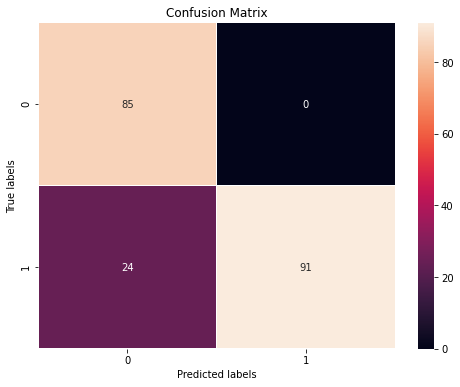

In [120]:
# Cria uma matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_teste04, y_pred04)

plt.figure()
plot_confusion_matrix(cnf_matrix)

print(metrics.classification_report(y_teste04, y_pred04))

hide_toggle()

In [121]:
for max_depth in [2,3,4]:
    model04 = DecisionTreeClassifier(max_depth = max_depth)
    model04.fit(X_treino04, y_treino04)
    
    y_pred04 = model04.predict(X_treino04)
    print('Profundidade:', max_depth, '-', 'Acurácia no treino', accuracy_score(y_treino04, y_pred04))
    
    y_pred04 = model04.predict(X_teste04)
    print('Profundidade:', max_depth, '-', 'Acurácia no teste', accuracy_score(y_teste04, y_pred04))
    
    vn, fp, fn, vp = confusion_matrix(y_teste04, y_pred04).ravel()
    print('VP:', vp)
    print('FP:', fp)
    print('VN:', vn)
    print('FN:', fn)
    print('---')

    p = vp / (vp + fp)
    r = vp / (vp + fn)
    fm = 2 * (p * r / (p + r))

    print(f'Precisão: {p}')
    print(f'Revocação: {r}')
    print(f'F-Medida: {fm}')
    print('\n')
    print('*'*30)
    print()
    
#hide_toggle()

Profundidade: 2 - Acurácia no treino 0.853
Profundidade: 2 - Acurácia no teste 0.88
VP: 91
FP: 0
VN: 85
FN: 24
---
Precisão: 1.0
Revocação: 0.7913043478260869
F-Medida: 0.883495145631068


******************************

Profundidade: 3 - Acurácia no treino 0.854
Profundidade: 3 - Acurácia no teste 0.88
VP: 91
FP: 0
VN: 85
FN: 24
---
Precisão: 1.0
Revocação: 0.7913043478260869
F-Medida: 0.883495145631068


******************************

Profundidade: 4 - Acurácia no treino 0.855
Profundidade: 4 - Acurácia no teste 0.885
VP: 92
FP: 0
VN: 85
FN: 23
---
Precisão: 1.0
Revocação: 0.8
F-Medida: 0.888888888888889


******************************



## Obrigado!